# Data Description:
The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

# Domain:
Banking

# Context:
This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.

# Objective:
The classification goal is to predict the likelihood of a liability customer buying personal loans.

In [1]:
###  Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
sns.set(rc={'figure.figsize':(13.7,8.27)}) # setting constant to increase seaborn graph sizes

In [2]:
### 2. Read the data as a data frame
rawBankDf = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
rawBankDf.head(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


# Attribute Information:
 ID : Customer ID
 Age : Customer's age in completed years
 Experience : #years of professional experience
 Income : Annual income of the customer ($000)
 ZIP Code : Home Address ZIP code.
 Family : Family size of the customer
 CCAvg : Avg. spending on credit cards per month ($000)
 Education : Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
 Mortgage : Value of house mortgage if any. ($000)
 Personal Loan : Did this customer accept the personal loan offered in thelast campaign?
 Securities Account : Does the customer have a securities account with the bank?
 CD Account : Does the customer have a certificate of deposit (CD)account with the bank?
 Online : Does the customer use internet banking facilities?
 Credit card : Does the customer use a credit card issued by UniversalBank?

1. Read the column description and ensure you understand each attribute well


2. Study the data distribution in each attribute, share your findings
Exploratory Data Analysis

In [3]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

print("Size of dataframe is " +color.BOLD+ format(rawBankDf.size) + color.END)
print("Shape(#rows,#columns) of dataframe is "+color.BOLD+ format(rawBankDf.shape) + color.END)
print("Dataframe information \n")
print(rawBankDf.info())
print("\nLet's see 5 point summary of numerical attributes \n")
rawBankDf.describe().transpose()

Size of dataframe is 70000
Shape(#rows,#columns) of dataframe is (5000, 14)
Dataframe information 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB
None

Let's see 5 point summary of numerical attributes 



,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


# Observation
- No null values
- No missing value

## Nominal Variables :
ID - Serial number only not to be consider in model building
zip code - represent area code

## Ordinal Categorical Variables:
Family - Family size of the customer
Education - education level of the customer represented by digit. 1: Undergrad; 2: Graduate;3: Advanced/Professional

## Interval variables are as below:

Age - Age of the customer
Experience - Years of experience
Income - Annual income in dollars
CCAvg - Average credit card spending in multiple of thousand dollars
Mortage - Value of House Mortgage

## Following variables are binary catergory - 

Personal Loan - This should be our target variable. Did this customer accept the personal loan offered in the last campaign? 
Securities Account - Does the customer have a securities account with the bank?
CD Account - Does the customer have a certificate of deposit (CD) account with the bank?
Online - Does the customer use internet banking facilities?
Credit Card - Does the customer use a credit card issued by UniversalBank?

From 5 point summary it can be seen that Experience column has negative values for years of professional experience. We need to correct that. Let find out how many rows have negative experience.

In [4]:
#find out unique negative values
rawBankDf[rawBankDf['Experience']<0]['Experience'].unique()

array([-1, -2, -3], dtype=int64)

In [5]:
rawBankDf[rawBankDf['Experience']<0]['Experience'].count()

52

Just over 1% rows have negative values for experinence. -1, -2,-3 are the negative values for experience. Upon observing data it looks like its not typo error(- sign added by mistake) but data seems to missing and we need to populate it stastically. Age column should have strong correlation with experience. We can use age column mean to populate negative values.

In [6]:
#correlation of Age vs Experience
rawBankDf['Age'].corr(rawBankDf['Experience'])

0.9942148569683315

Bingo!! 0.99 indicates very strong correlation. Let's find out mean age value and replace it.

In [7]:
# out age values with negative experience values.  
rawBankDf[rawBankDf['Experience']<0]['Age'].value_counts()

25    18
24    17
23    12
29     3
28     1
26     1
Name: Age, dtype: int64

In [8]:
#finding mean of experinece for age values below 30 and having postive experience
rawBankDf[ (rawBankDf['Age']<30) & (rawBankDf['Experience']>0) ].groupby('Age', as_index=False)['Experience'].mean()

,Age,Experience
0,25,1.000000
1,26,1.551020
2,27,2.108434
3,28,3.009804
4,29,3.865546


In [9]:
cleanBankDF = rawBankDf.copy()
cleanBankDF.loc[ (rawBankDf['Age']==23) & (cleanBankDF['Experience']<0),['Experience'] ]

,Experience
670,-1
909,-1
2430,-1
2618,-3
2717,-2
2962,-2
3130,-2
3157,-1
3425,-1
3824,-1


In [10]:
# Replacing the experinece mean value with nearest upper integer of mean experince in above dataframe as per age.
cleanBankDF.loc[ (cleanBankDF['Age']==23) & (cleanBankDF['Experience']<0),['Experience'] ] = 0
cleanBankDF.loc[ (cleanBankDF['Age']==24) & (cleanBankDF['Experience']<0),['Experience'] ] = 0
cleanBankDF.loc[ (cleanBankDF['Age']==25) & (cleanBankDF['Experience']<0),['Experience'] ] = 1
cleanBankDF.loc[ (cleanBankDF['Age']==26) & (cleanBankDF['Experience']<0),['Experience'] ] = 2
cleanBankDF.loc[ (cleanBankDF['Age']==27) & (cleanBankDF['Experience']<0),['Experience'] ] = 2
cleanBankDF.loc[ (cleanBankDF['Age']==28) & (cleanBankDF['Experience']<0),['Experience'] ] = 3
cleanBankDF.loc[ (cleanBankDF['Age']==29) & (cleanBankDF['Experience']<0),['Experience'] ] = 4

In [11]:
#check if negative values are gone
cleanBankDF[cleanBankDF['Experience']<0]['Experience'].count()

0

In [12]:
# Now we clean data . Drop ID and zip code column as they are irrelevant for our model
cleanBankDF.drop(columns=['ID', 'ZIP Code'], axis=1, inplace=True)

In [13]:
cleanBankDF.head(5)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


2. Data distribution in each attribute, share your findings

C:\Users\phlegmatic\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\phlegmatic\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\phlegmatic\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\phlegmatic\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


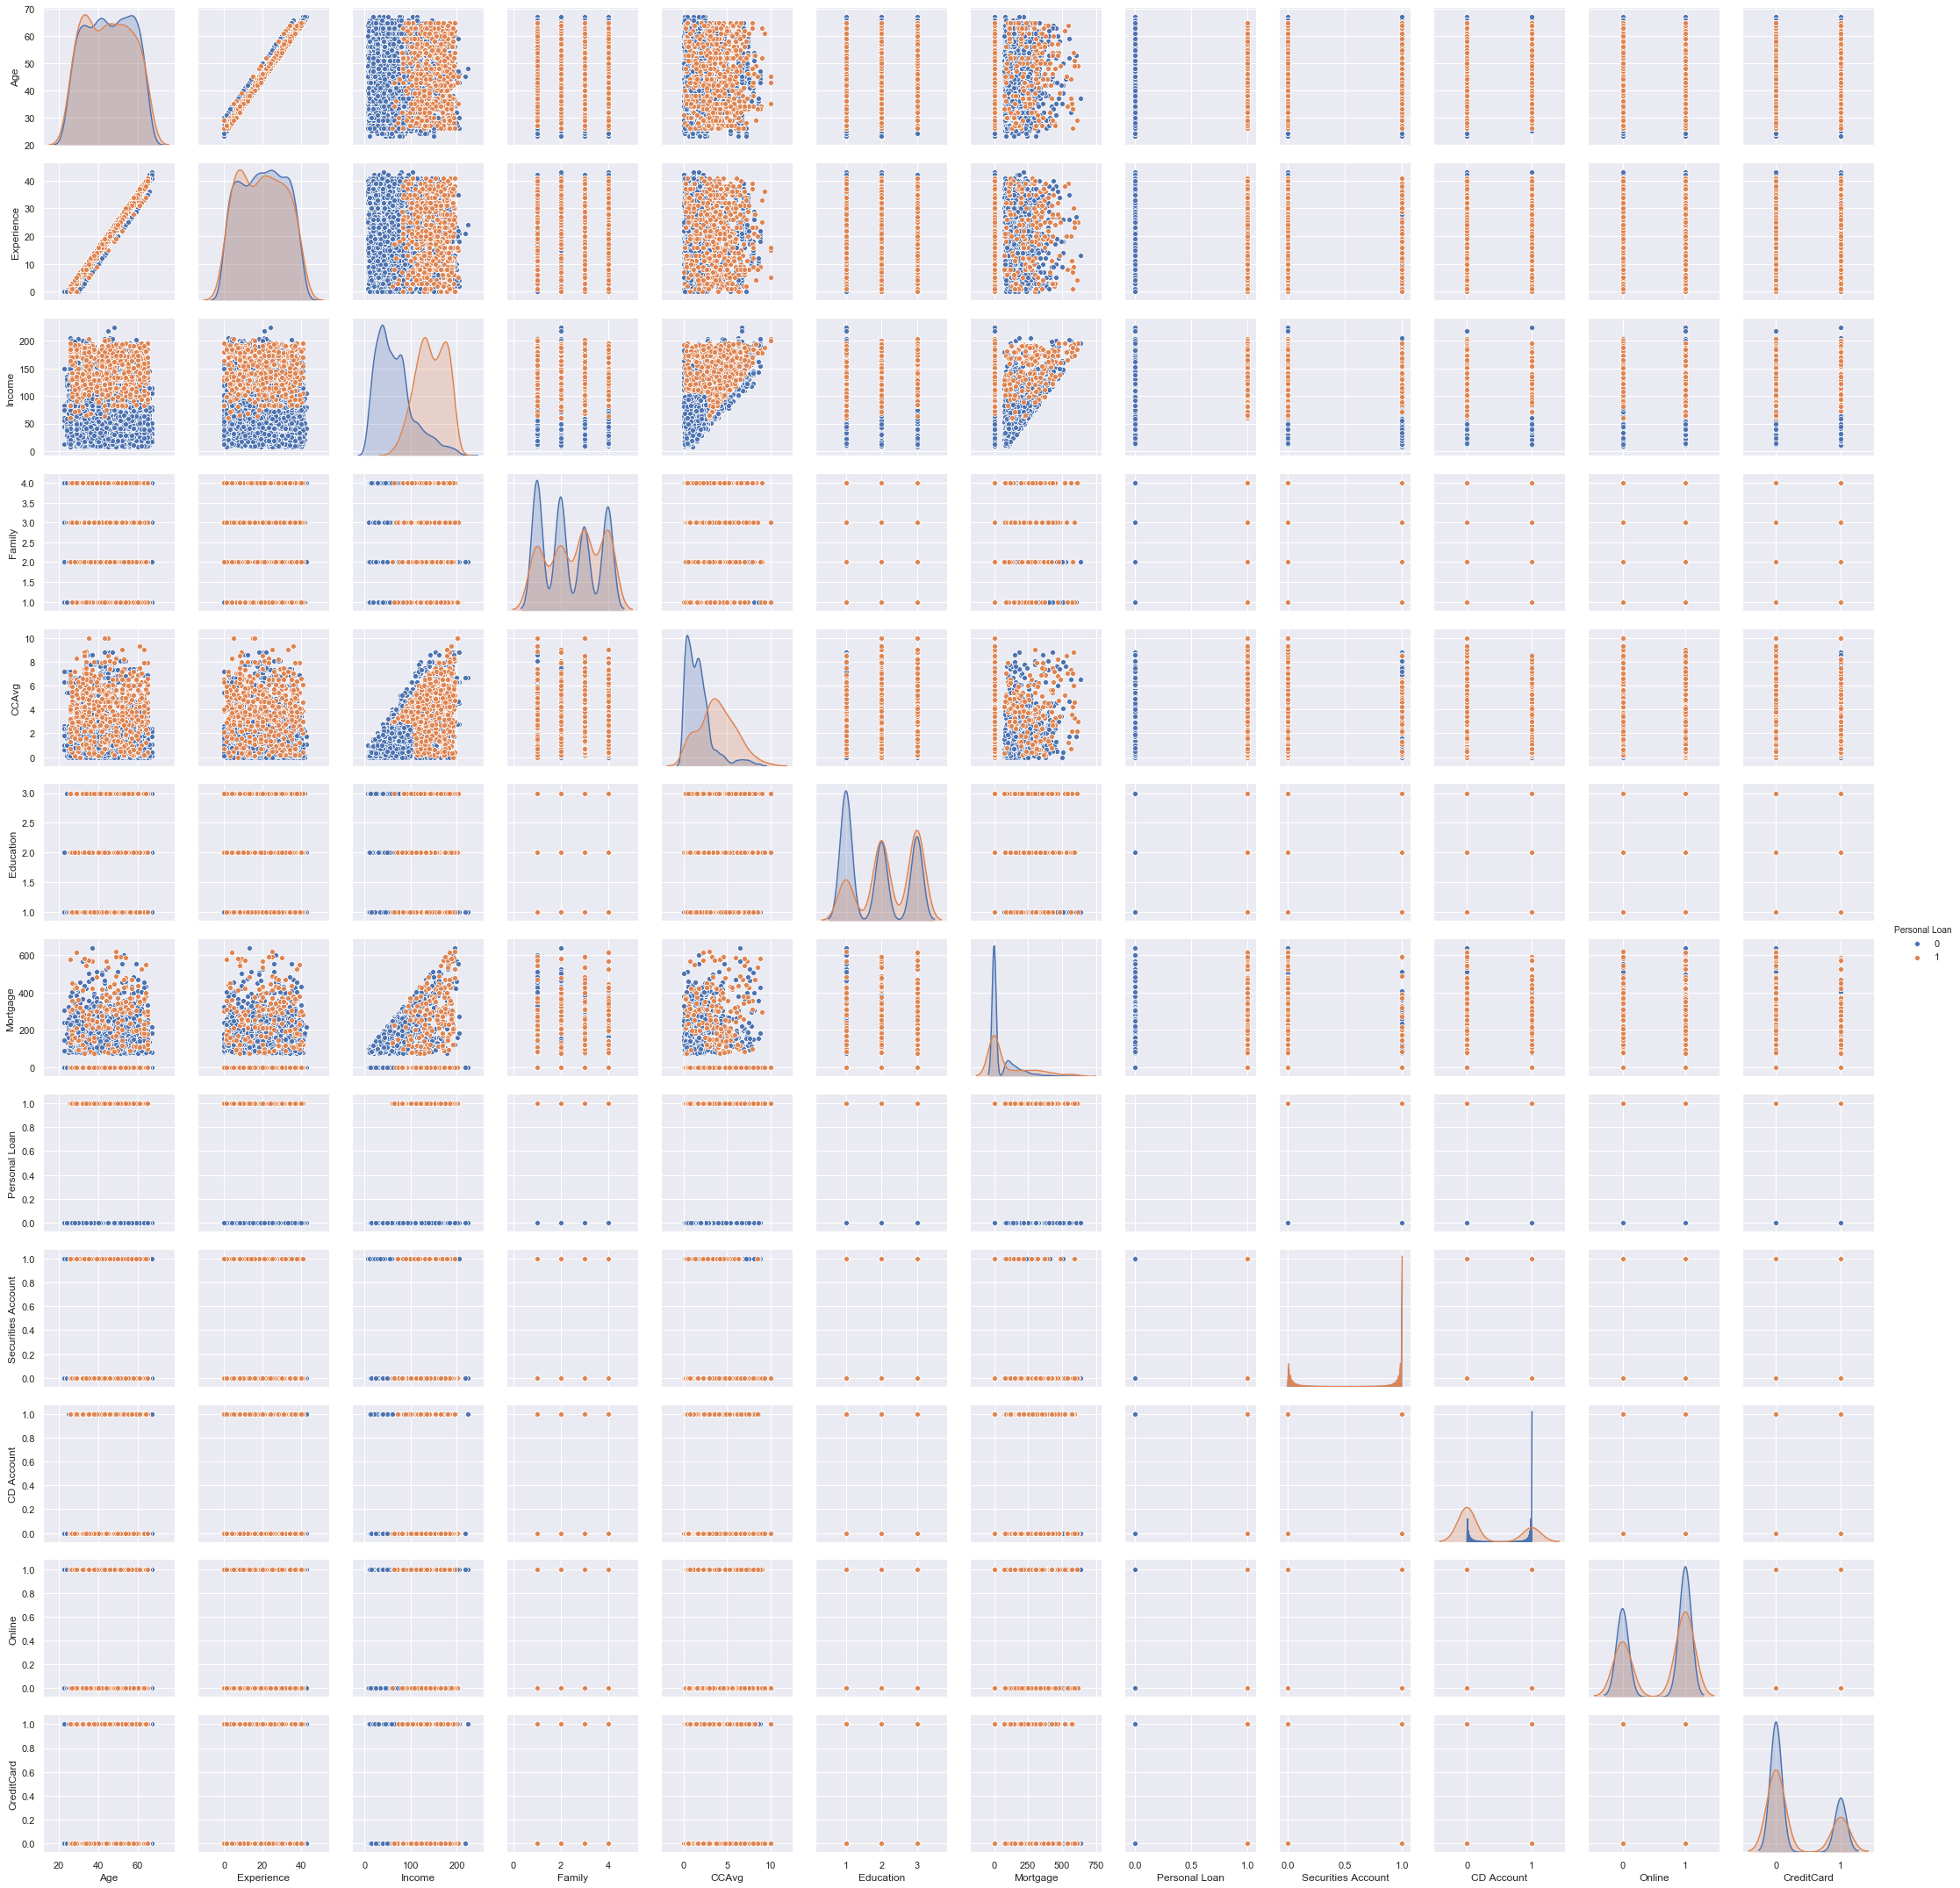

In [14]:
sns.pairplot(cleanBankDF,diag_kind="kde",hue = "Personal Loan")

From above pairplot we can state below observations.
- Age and experinece have linear relationship. 
- Higher income person more likely to personal loan (kde diag)
- Family size has impact on personal loan. Large Family size more likey to take personal loan(kde diag)
- Higher CCAvg ( Expenditure on credit card) spenders are more likely to take personal loan.
- Deposit holders more likely to take personal loan.

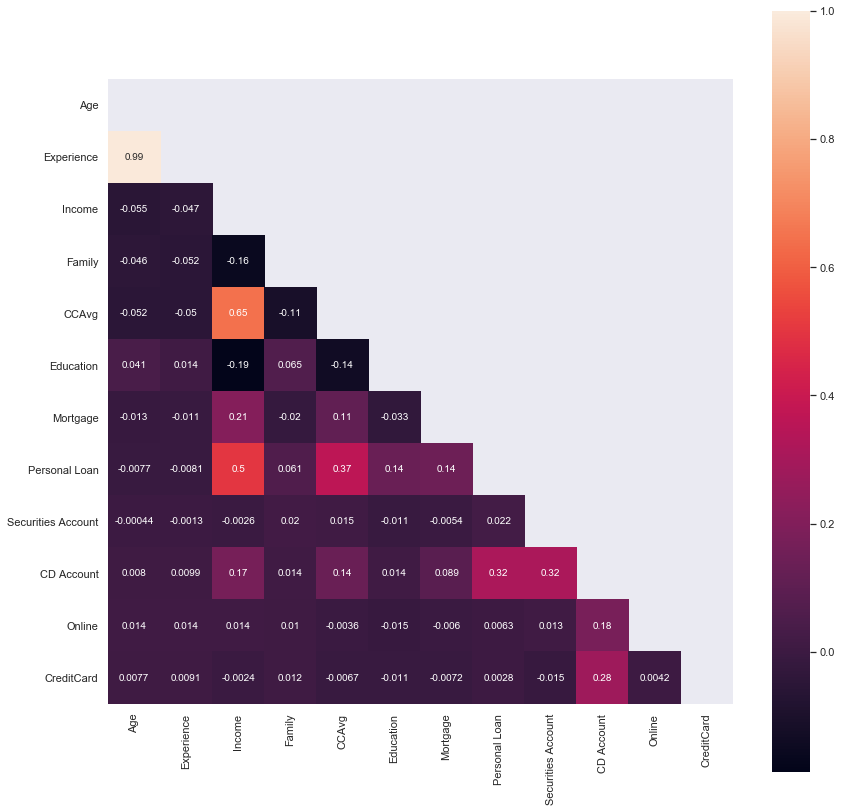

In [15]:
mask = np.zeros_like(cleanBankDF.corr())
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(14, 14))
sns.heatmap(cleanBankDF.corr(), mask=mask,annot=True,square=True)

# Observations:
1. Age and Experience have high correlation as stated earlier.
2. Income influences CCAvg, Personal Loan.
3. Following attributes have correlations with personal loan (in decreasing order)
   - Income
   - CCAvg
   - CD Account
   - Education
   - Mortgage
 

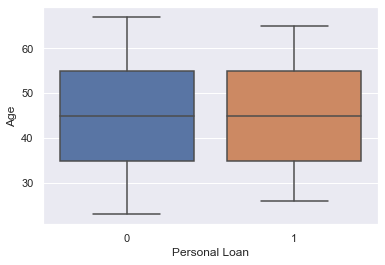

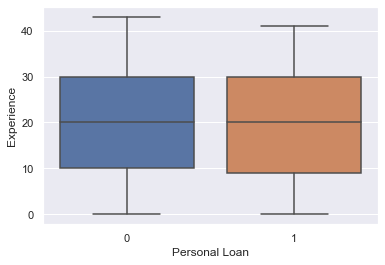

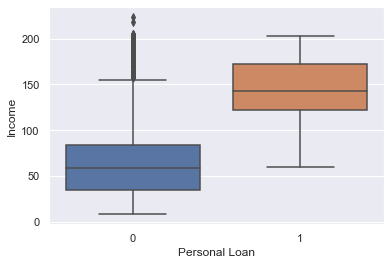

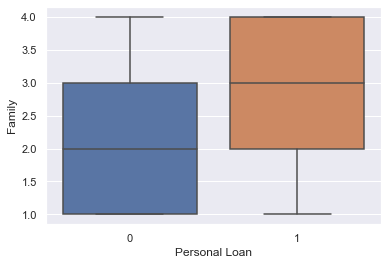

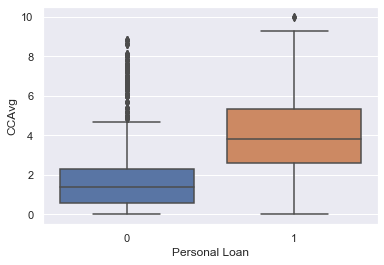

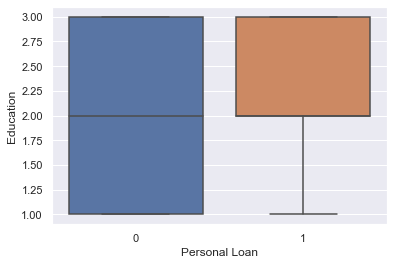

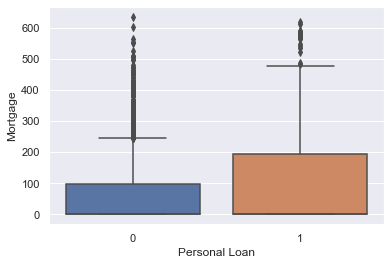

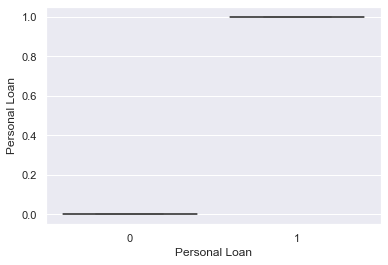

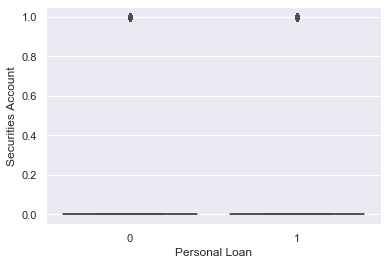

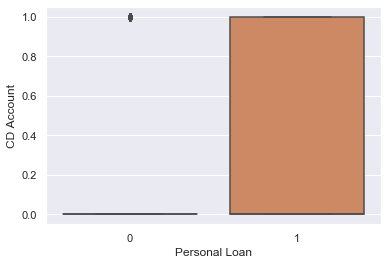

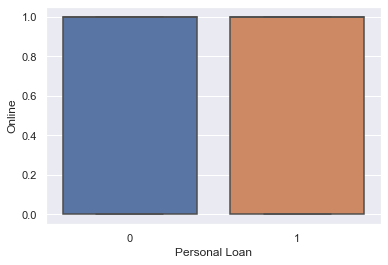

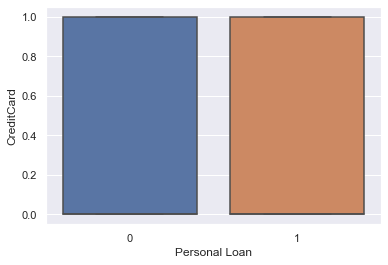

In [16]:
#Personal Loan column distribution box plot against each column
for column in cleanBankDF:
    plt.figure()
    sns.boxplot(x="Personal Loan",y=column,data=cleanBankDF)

From above box plots we understand following points about personal loan
1. Age,Experience,Securities Account,online,credit card has no effect
2. Above 100K income are more likely to take personal loan.
3. Person having above 2 family members are more likely to take personal loan.
4. Person having CCAvg spend above 2000 dollars is more likely to take personal loan.
5. Graduate and Advanced/Professional are more likely to take personal loan.
6. Person having more than 100K mortage are more likely to take personal loan.
7. Person taking personal loan has CD Account.

# Applying algorithms
First we will split the data into training and test set in the ratio of 70:30 respectively.

In [17]:
cleanBankDF.head(2)

from sklearn.model_selection import train_test_split
x = cleanBankDF.drop(['Age','Experience','Personal Loan','Securities Account','Online','CreditCard'], axis=1)
#x=cleanBankDF.drop('Personal Loan', axis=1)
y=cleanBankDF['Personal Loan']
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.3, random_state=42)

Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans. Print the confusion matrix for all the above models


C:\Users\phlegmatic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


logistic_score 0.9446666666666667
Classification_report 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      1343
           1       0.86      0.56      0.68       157

    accuracy                           0.94      1500
   macro avg       0.91      0.78      0.82      1500
weighted avg       0.94      0.94      0.94      1500

Confusion_matrix 
 [[1329   14]
 [  69   88]]


Text(0.5, 1, 'Confusion Matrix')

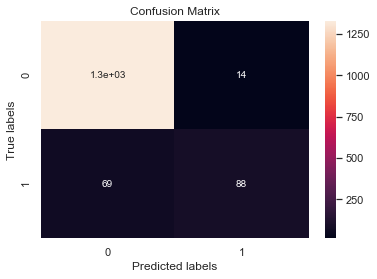

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logistic=LogisticRegression()
logistic.fit(X_train, y_train)
logistic_score= logistic.score(X_test,y_test)
#Predict the test results
y_predict = logistic.predict(X_test)
print("logistic_score", logistic_score)
print("Classification_report \n" ,metrics.classification_report(y_test, y_predict))
print("Confusion_matrix \n",metrics.confusion_matrix(y_test, y_predict))
ax= plt.subplot()
sns.heatmap(metrics.confusion_matrix(y_test, y_predict), annot=True, ax = ax); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix')

nb_score 0.8913333333333333
Classification_report 
               precision    recall  f1-score   support

           0       0.95      0.93      0.94      1343
           1       0.48      0.60      0.54       157

    accuracy                           0.89      1500
   macro avg       0.72      0.76      0.74      1500
weighted avg       0.90      0.89      0.90      1500

Confusion_matrix 
 [[1243  100]
 [  63   94]]


Text(0.5, 1, 'Confusion Matrix')

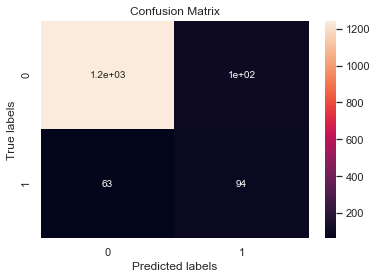

In [19]:
from sklearn.naive_bayes import GaussianNB
naive_bayes= GaussianNB()
naive_bayes.fit(X_train, y_train)
nb_score=naive_bayes.score(X_test, y_test)
y_predict = naive_bayes.predict(X_test)
print("nb_score", nb_score)
print("Classification_report \n" ,metrics.classification_report(y_test, y_predict))
print("Confusion_matrix \n",metrics.confusion_matrix(y_test, y_predict))
ax= plt.subplot()
sns.heatmap(metrics.confusion_matrix(y_test, y_predict), annot=True, ax = ax); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix')

Text(0, 0.5, 'Error Rate')

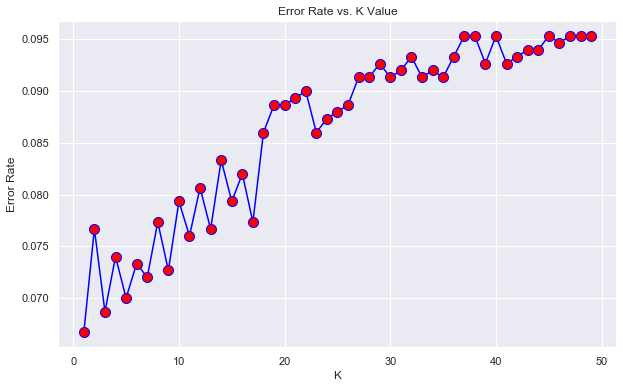

In [20]:
from sklearn.neighbors import KNeighborsClassifier

##Finding out the best number of neighbour value to be used by lopping till 20
error_rate = []

for i in range(1,50): 
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue',  marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

knn_score 0.934
Classification_report 
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      1343
           1       0.73      0.59      0.65       157

    accuracy                           0.93      1500
   macro avg       0.84      0.78      0.81      1500
weighted avg       0.93      0.93      0.93      1500

Confusion_matrix 
 [[1308   35]
 [  64   93]]


Text(0.5, 1, 'Confusion Matrix')

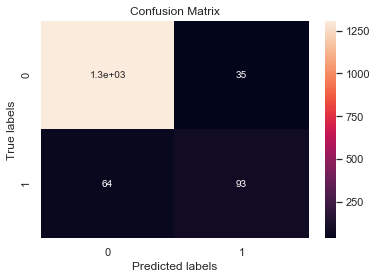

In [21]:
#Above loop suggested 3 neighbour size gives least error rate so let's use that.

NNH_a= KNeighborsClassifier(n_neighbors= 3 , weights = 'distance' )
NNH_a.fit(X_train, y_train)
y_predict = NNH_a.predict(X_test)
knn_score = NNH_a.score(X_test, y_test)
print("knn_score", knn_score)
print("Classification_report \n" ,metrics.classification_report(y_test, y_predict))
print("Confusion_matrix \n",metrics.confusion_matrix(y_test, y_predict))
ax= plt.subplot()
sns.heatmap(metrics.confusion_matrix(y_test, y_predict), annot=True, ax = ax); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix')


knn_score 0.9746666666666667
Classification_report 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      1343
           1       0.98      0.78      0.87       157

    accuracy                           0.97      1500
   macro avg       0.98      0.89      0.93      1500
weighted avg       0.97      0.97      0.97      1500

Confusion_matrix 
 [[1340    3]
 [  35  122]]


Text(0.5, 1, 'Confusion Matrix')

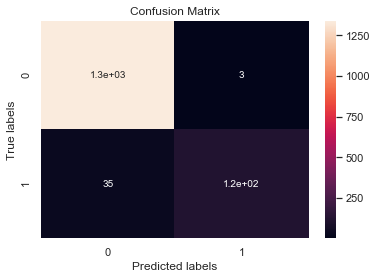

In [24]:
### let us check the effect of scaling (convert all dimensions to z scores)
from sklearn import preprocessing
X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)
NNH_a.fit(X_train_scaled, y_train)
y_predict = NNH_a.predict(X_test_scaled)
knn_score = NNH_a.score(X_test_scaled, y_test)
print("knn_score", knn_score)
print("Classification_report \n" ,metrics.classification_report(y_test, y_predict))
print("Confusion_matrix \n",metrics.confusion_matrix(y_test, y_predict))
ax= plt.subplot()
sns.heatmap(metrics.confusion_matrix(y_test, y_predict), annot=True, ax = ax); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix')

# Remarks

Logistic Regession was performing better over knn and naive byes as we can see from the confusion matrix and score of each model.The other parameters such as accuracy, recall ,precision, F_score are also better in case of logistic regression over other algorithms. After scaling knn gave us good results.